# Testing the PyQuaternion Library
> Gil Miranda<br>
> Contact: gilsmneto@gmail.com<br>
> Repo: https://github.com/mirandagil/geometric-mechanics<br>
> Bibliography:
   * http://www.im.ufrj.br/bernardofpc/cursos/cientificaI/2017/Semana2-Parte2-Bissecao.ipynb
   
`last update: 16/08/2019`

This notebook has the intention to use and learn about rotating vectors with Quaternions, also learn and get used to the pyQuaternion library, created by `@kieranwynn`: https://github.com/KieranWynn/pyquaternion

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import numpy as np
import pyquaternion as pyQ

#### Defining functions that return a rotation matrix based on and angle $\varphi$

In [2]:
def Rx(phi):
    return np.array([[1,0,0],[0,np.cos(phi),-np.sin(phi)],[0,np.sin(phi),np.cos(phi)]])

def Ry(phi):
    return np.array([[np.cos(phi), 0, np.sin(phi)],[0,1,0],[-np.sin(phi),0,np.cos(phi)]])

def Rz(phi):
    return np.array([[np.cos(phi),-np.sin(phi),0],[np.sin(phi),np.cos(phi),0],[0,0,1]])


In [3]:
x = 0
y = 0
z = 0
u = [0,0,1]

### Rotating vector with Rotation Matrix

In [4]:
R_z = Rz(np.pi/2)
u_rz = R_z@u

R_x = Rx(np.pi/2)
u_rx = R_x@u

R_y = Ry(np.pi/2)
u_ry = R_y@u

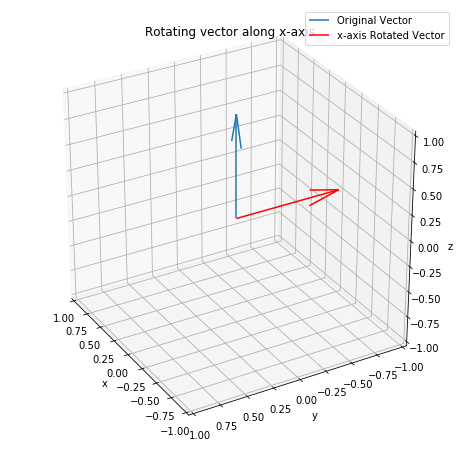

Original Vector: [0, 0, 1]
Rotated Vector: [ 0.000000e+00 -1.000000e+00  6.123234e-17]


In [5]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, u_rx[0], u_rx[1], u_rx[2], label = 'x-axis Rotated Vector', color = 'red')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init( azim = 150)
plt.title('Rotating vector along x-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(u_rx))

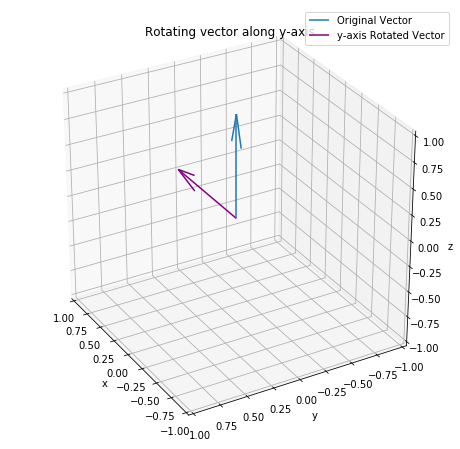

Original Vector: [0, 0, 1]
Rotated Vector: [1.000000e+00 0.000000e+00 6.123234e-17]


In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, u_ry[0], u_ry[1], u_ry[2], label = 'y-axis Rotated Vector', color = 'purple')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init(azim = 150)
plt.title('Rotating vector along y-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(u_ry))

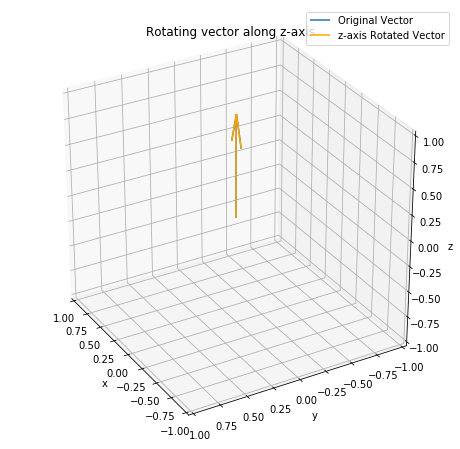

Original Vector: [0, 0, 1]
Rotated Vector: [0. 0. 1.]


In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, u_rz[0], u_rz[1], u_rz[2], label = 'z-axis Rotated Vector', color = 'orange')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init(azim = 150)
plt.title('Rotating vector along z-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(u_rz))

### Rotating vectors with quaternions

Now let's do the same rotations, but now with Quaternions.
I'll create the quaternions using a direction of rotation and an angle

In [8]:
x_axis = [1,0,0]
y_axis = [0,1,0]
z_axis = [0,0,1]
Rx_q = pyQ.Quaternion(axis = x_axis, radians = np.pi/2)
Ry_q = pyQ.Quaternion(axis = y_axis, radians = np.pi/2)
Rz_q = pyQ.Quaternion(axis = z_axis, radians = np.pi/2)
ux_q = Rx_q.rotate(u)
uy_q = Ry_q.rotate(u)
uz_q = Rz_q.rotate(u)

In [13]:
ux_q

[0.0, -1.0, 2.220446049250313e-16]

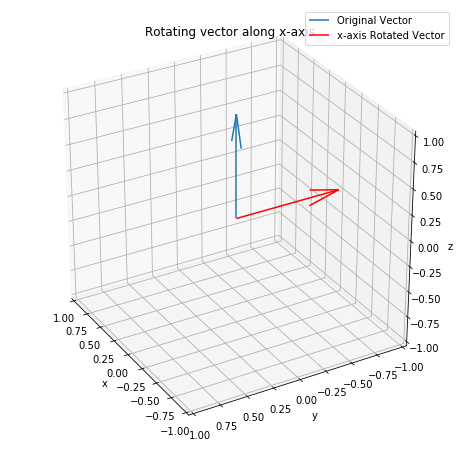

Original Vector: [0, 0, 1]
Rotated Vector: [0.0, -1.0, 2.220446049250313e-16]


In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, ux_q[0], ux_q[1], ux_q[2], label = 'x-axis Rotated Vector', color = 'red')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init( azim = 150)
plt.title('Rotating vector along x-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(ux_q))

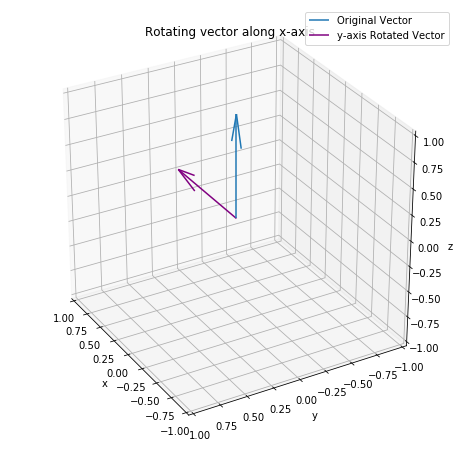

Original Vector: [0, 0, 1]
Rotated Vector: [1.0, 0.0, 2.220446049250313e-16]


In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, uy_q[0], uy_q[1], uy_q[2], label = 'y-axis Rotated Vector', color = 'purple')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init( azim = 150)
plt.title('Rotating vector along x-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(uy_q))

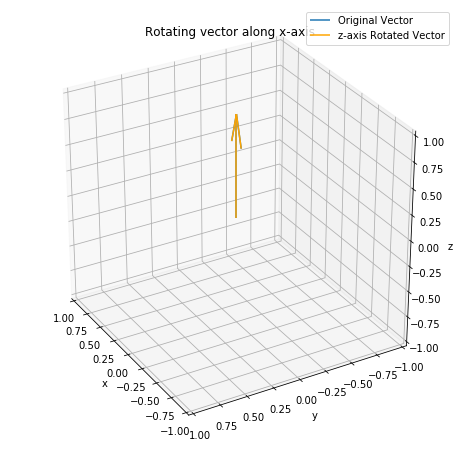

Original Vector: [0, 0, 1]
Rotated Vector: [0.0, 0.0, 1.0]


In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(x, y, z, u[0], u[1], u[2], label = 'Original Vector')
ax.quiver(x, y, z, uz_q[0], uz_q[1], uz_q[2], label = 'z-axis Rotated Vector', color = 'orange')
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.view_init( azim = 150)
plt.title('Rotating vector along x-axis')
plt.show()
print('Original Vector: ' + str(u))
print('Rotated Vector: ' + str(uz_q))

So the PyQuaternion Library works just as we expected!

Now I'll compare the rotation using PyQuaternions with Iago Leal's Quaternion code, so we make sure all conventions assumed are equal.

#### Iago's code for quaternion rotation

In [12]:
def q_mult(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return np.array([w, x, y, z])

def q_conjugate(q):
    return np.array([q[0], -q[1], -q[2], -q[3]])

def rotate(q, v):
    q = normalize(q)
    vec = np.concatenate(([0.0], v))
    return q_mult(q_mult(q, vec), q_conjugate(q))[1:]

def normalize(q, tolerance=1e-5):
    magnitude2 = sum(x * x for x in q)

    if abs(magnitude2 - 1.0) > tolerance:
        magnitude = np.sqrt(magnitude2)
        q = np.array([x / magnitude for x in q])

    return q

def ax2quaternion(v, theta):
    q = [0]*4
    v = normalize(v)
    q[0] = np.cos(theta/2.0)

    q[1] = v[0] * np.sin(theta/2.0)
    q[2] = v[1] * np.sin(theta/2.0)
    q[3] = v[2] * np.sin(theta/2.0)
    return q


#### Generating the quaternions that rotate $\frac{\pi}{2}$ along side each axis

In [13]:
i_qx = ax2quaternion(x_axis, np.pi/2)
i_qy = ax2quaternion(y_axis, np.pi/2)
i_qz = ax2quaternion(z_axis, np.pi/2)

In [14]:
print("Iago's X-Axis Quaternion: "+ str(i_qx))
print("PyQuaternion's X-Axis Quaternion: "+ str(Rx_q))

Iago's X-Axis Quaternion: [0.7071067811865476, 0.7071067811865475, 0.0, 0.0]
PyQuaternion's X-Axis Quaternion: 0.707 +0.707i +0.000j +0.000k


In [15]:
print("Iago's Y-Axis Quaternion: "+ str(i_qy))
print("PyQuaternion's Y-Axis Quaternion: "+ str(Ry_q))

Iago's Y-Axis Quaternion: [0.7071067811865476, 0.0, 0.7071067811865475, 0.0]
PyQuaternion's Y-Axis Quaternion: 0.707 +0.000i +0.707j +0.000k


In [16]:
print("Iago's Z-Axis Quaternion: "+ str(i_qz))
print("PyQuaternion's Z-Axis Quaternion: "+ str(Rz_q))

Iago's Z-Axis Quaternion: [0.7071067811865476, 0.0, 0.0, 0.7071067811865475]
PyQuaternion's Z-Axis Quaternion: 0.707 +0.000i +0.000j +0.707k


Both code generates the same Quaternions for the same rotation, time to rotate some vectors and compare

In [17]:
ui_x = rotate(i_qx, u)
ui_y = rotate(i_qy, u)
ui_z = rotate(i_qz, u)

In [18]:
print("Iago's X-Axis Rotated Vector: "+ str(ui_x))
print("PyQuaternion's X-Axis Rotated Vector: "+ str(ux_q))

Iago's X-Axis Rotated Vector: [ 0.00000000e+00 -1.00000000e+00  2.22044605e-16]
PyQuaternion's X-Axis Rotated Vector: [0.0, -1.0, 2.220446049250313e-16]


In [19]:
print("Iago's Y-Axis Rotated Vector: "+ str(ui_y))
print("PyQuaternion's Y-Axis Rotated Vector: "+ str(uy_q))

Iago's Y-Axis Rotated Vector: [1.00000000e+00 0.00000000e+00 2.22044605e-16]
PyQuaternion's Y-Axis Rotated Vector: [1.0, 0.0, 2.220446049250313e-16]


In [20]:
print("Iago's Z-Axis Rotated Vector: "+ str(ui_z))
print("PyQuaternion's Z-Axis Rotated Vector: "+ str(uz_q))

Iago's Z-Axis Rotated Vector: [0. 0. 1.]
PyQuaternion's Z-Axis Rotated Vector: [0.0, 0.0, 1.0]


### Rotating a cube of side 1

In [26]:
x, y, z = 0, 0, 0
cube = [np.array([1,0,0]),
       np.array([0,1,0]),
       np.array([0,0,1])]

cube_origin = [
    [[0,0,1],[0,1,1],[0,1,0]],
    [[1,0,0],[1,0,1],[0,0,1]],
    [[1,0,0],[1,1,0],[0,1,0]]
]

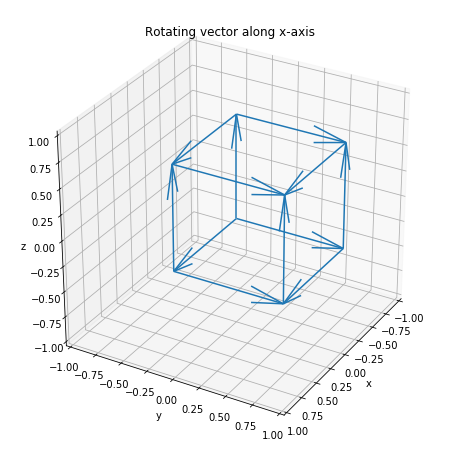

In [31]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
for (c,o) in zip(cube, cube_origin):
    ax.quiver(x, y, z, c[0], c[1], c[2])
    ax.quiver(o[0][0], o[0][1], o[0][2], c[0], c[1], c[2])
    ax.quiver(o[1][0], o[1][1], o[1][2], c[0], c[1], c[2])
    ax.quiver(o[2][0], o[2][1], o[2][2], c[0], c[1], c[2])
    

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init( azim = 30)
plt.title('Rotating vector along x-axis')
plt.show()

In [78]:
rot_axis = [1,1,0]
phi = np.pi/6
Q_cube = pyQ.Quaternion(axis = rot_axis, radians = phi)
rot_cube = []
rot_cube_origin = []
for (c,co) in zip(cube, cube_origin):
    aux = []
    rot_cube.append(Q_cube.rotate(c))
    aux.append(Q_cube.rotate(co[0]))
    aux.append(Q_cube.rotate(co[1]))
    aux.append(Q_cube.rotate(co[2]))
    rot_cube_origin.append(aux)
    

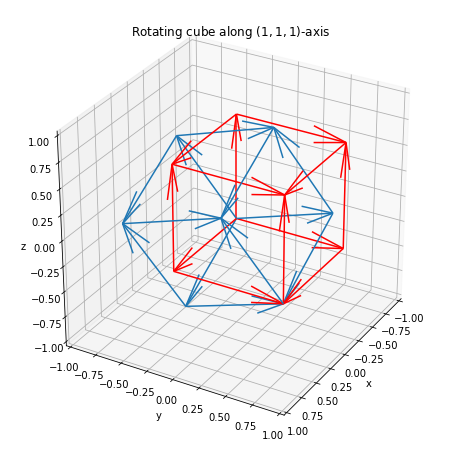

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
for (c,o) in zip(rot_cube, rot_cube_origin):
    ax.quiver(x, y, z, c[0], c[1], c[2])
    ax.quiver(o[0][0], o[0][1], o[0][2], c[0], c[1], c[2])
    ax.quiver(o[1][0], o[1][1], o[1][2], c[0], c[1], c[2])
    ax.quiver(o[2][0], o[2][1], o[2][2], c[0], c[1], c[2])
for (c,o) in zip(cube, cube_origin):
    ax.quiver(x, y, z, c[0], c[1], c[2], color = 'red')
    ax.quiver(o[0][0], o[0][1], o[0][2], c[0], c[1], c[2], color = 'red')
    ax.quiver(o[1][0], o[1][1], o[1][2], c[0], c[1], c[2],color = 'red')
    ax.quiver(o[2][0], o[2][1], o[2][2], c[0], c[1], c[2], color = 'red')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init( azim = 30)
plt.title('Rotating cube along $(1,1,1)$-axis')
plt.show()

In [27]:
np.pi/10

0.3141592653589793

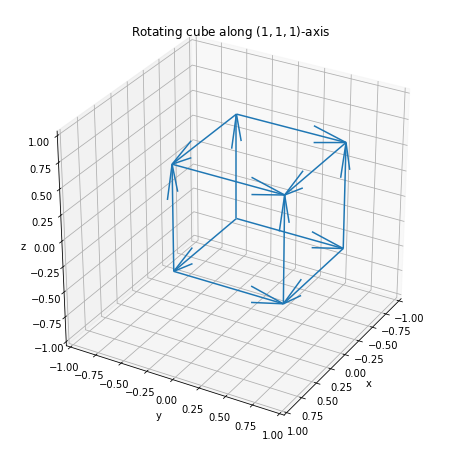

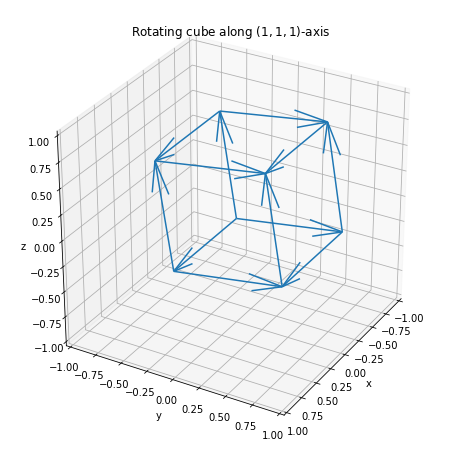

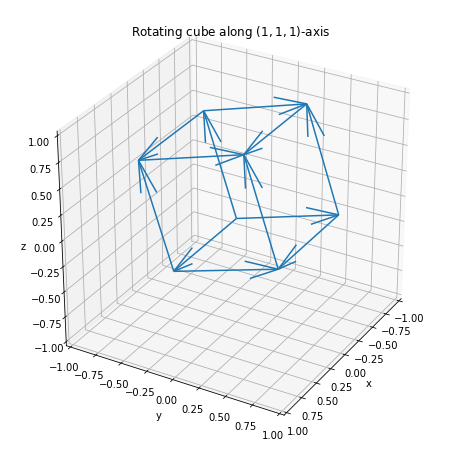

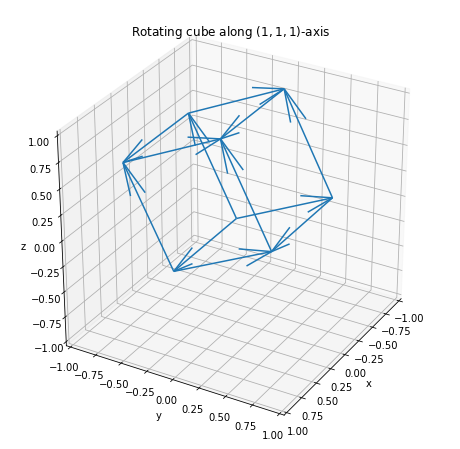

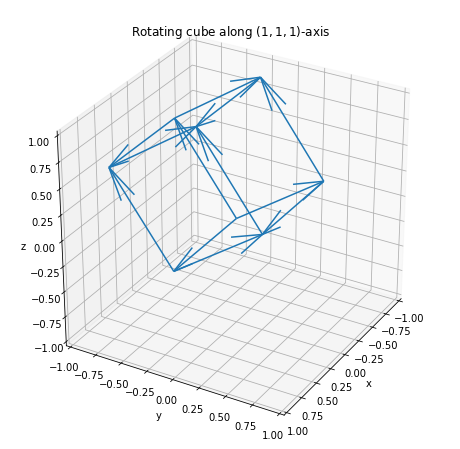

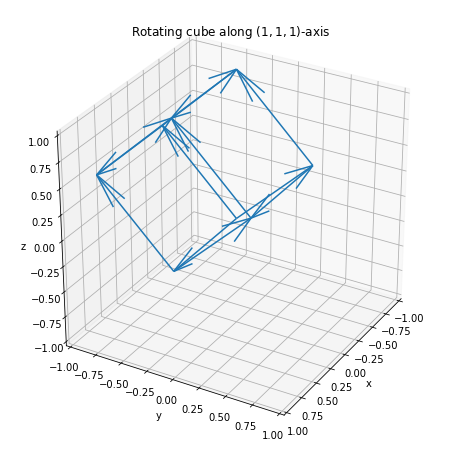

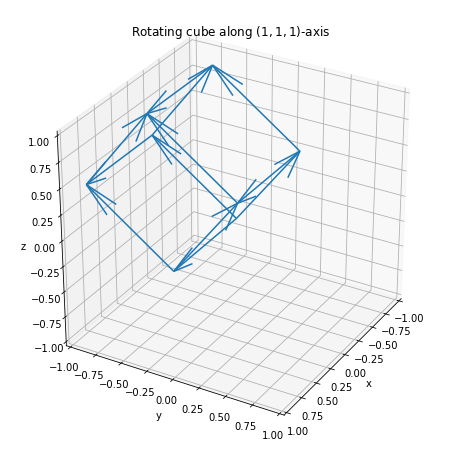

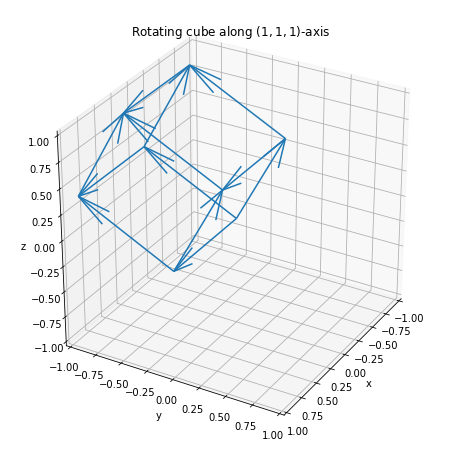

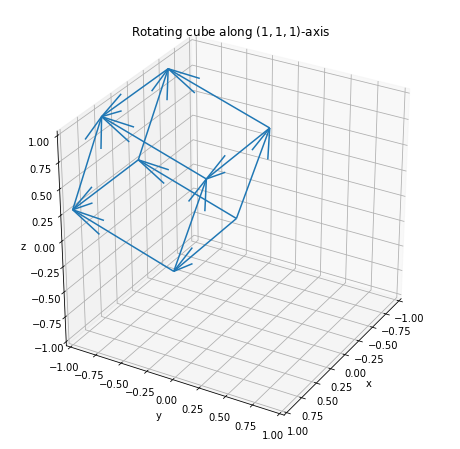

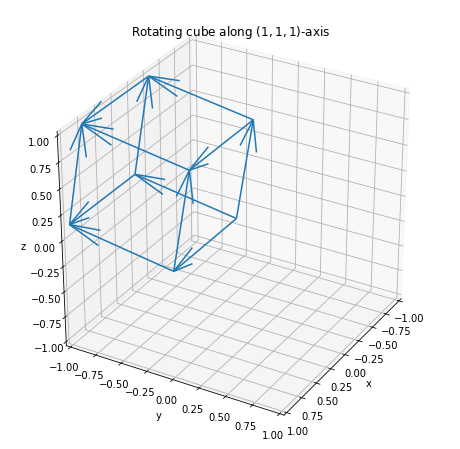

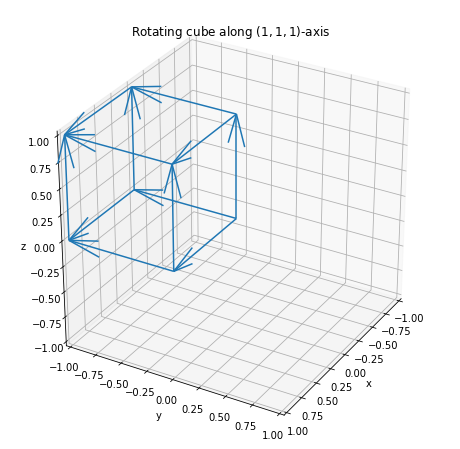

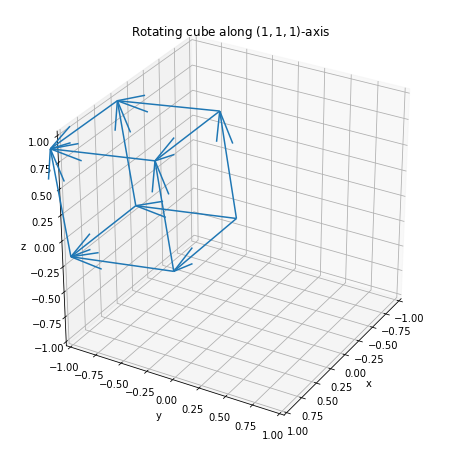

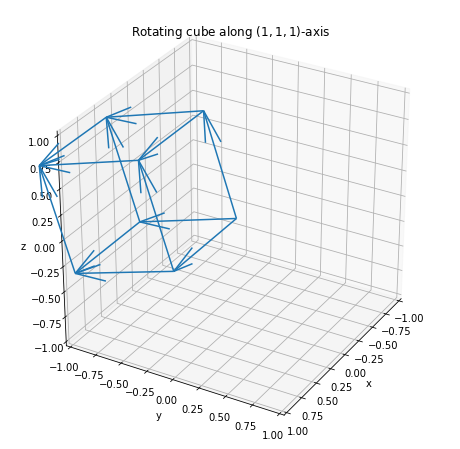

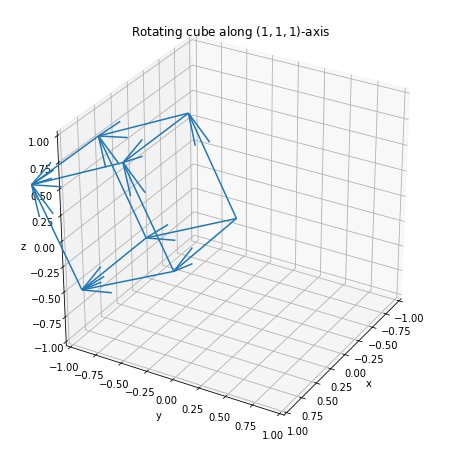

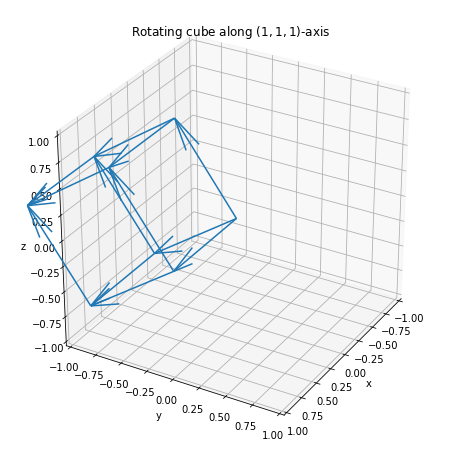

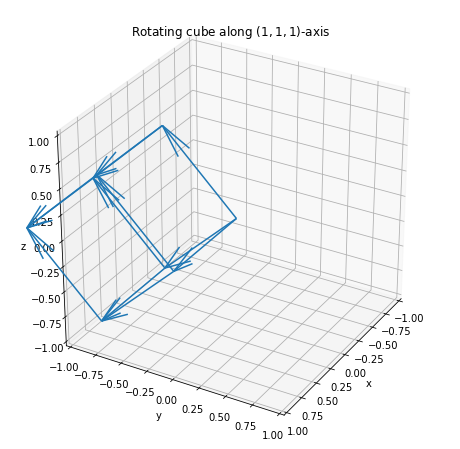

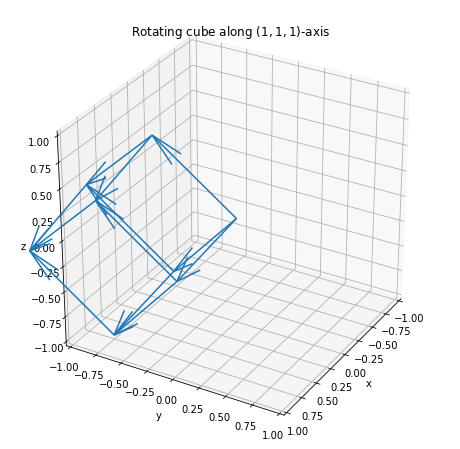

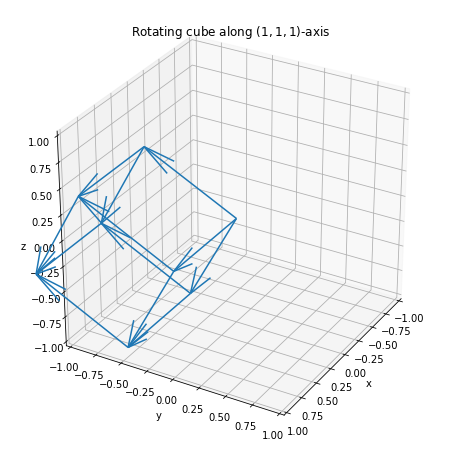

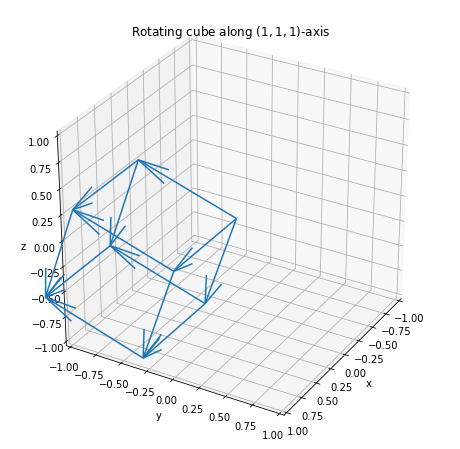

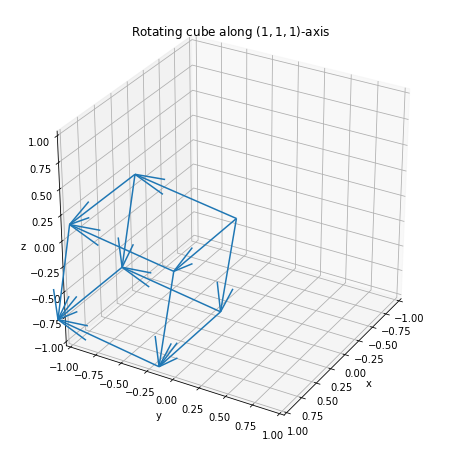

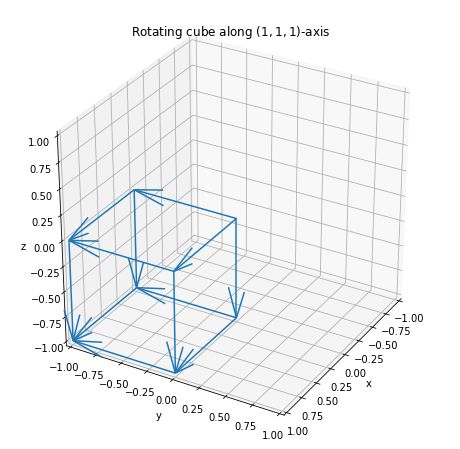

In [39]:
rot_axis = [1/2,0,0]
phi_0 = 0
phi_f = np.pi
step = np.pi/20
p = phi_0
while p <= phi_f:
    Q_cube = pyQ.Quaternion(axis = rot_axis, radians = p)
    rot_cube = []
    rot_cube_origin = []
    p += step
    for (c,co) in zip(cube, cube_origin):
        aux = []
        rot_cube.append(Q_cube.rotate(c))
        aux.append(Q_cube.rotate(co[0]))
        aux.append(Q_cube.rotate(co[1]))
        aux.append(Q_cube.rotate(co[2]))
        rot_cube_origin.append(aux)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection = '3d')
    for (c,o) in zip(rot_cube, rot_cube_origin):
        ax.quiver(x, y, z, c[0], c[1], c[2])
        ax.quiver(o[0][0], o[0][1], o[0][2], c[0], c[1], c[2])
        ax.quiver(o[1][0], o[1][1], o[1][2], c[0], c[1], c[2])
        ax.quiver(o[2][0], o[2][1], o[2][2], c[0], c[1], c[2])


    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init( azim = 30)
    plt.title('Rotating cube along $(1,1,1)$-axis')
    plt.show()

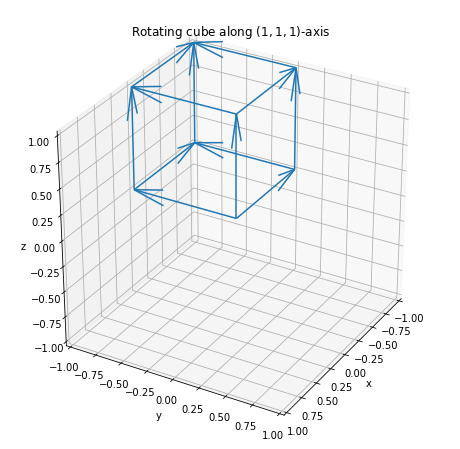